In [986]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [987]:
df = pd.read_csv('./data/train_data.csv')
test = pd.read_csv('./data/test_data.csv')
print(len(df))
df.head()

15257


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
2,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
3,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
4,291457.0,Gloomhaven: Jaws of the Lion,2020.0,1,4,120,14,8392,"8,87",6,"3,55",21609.0,"Action Queue, Campaign / Battle Card Driven, C...","Strategy Games, Thematic Games"


In [988]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15257 entries, 0 to 15256
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15247 non-null  float64
 1   Name                15257 non-null  object 
 2   Year Published      15256 non-null  float64
 3   Min Players         15257 non-null  int64  
 4   Max Players         15257 non-null  int64  
 5   Play Time           15257 non-null  int64  
 6   Min Age             15257 non-null  int64  
 7   Users Rated         15257 non-null  int64  
 8   Rating Average      15257 non-null  object 
 9   BGG Rank            15257 non-null  int64  
 10  Complexity Average  15257 non-null  object 
 11  Owned Users         15240 non-null  float64
 12  Mechanics           14057 non-null  object 
 13  Domains             7608 non-null   object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.6+ MB


In [989]:
# посмотрим на пропуски
df.isna().sum()

ID                      10
Name                     0
Year Published           1
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
Rating Average           0
BGG Rank                 0
Complexity Average       0
Owned Users             17
Mechanics             1200
Domains               7649
dtype: int64

In [990]:
df[df['Year Published'].isna()]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
10496,NaN,Hus,NaN,2,2,40,0,38,"6,28",13986,2,NaN,NaN,NaN


In [991]:
df[df['Owned Users'].isna()]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
2100,202755.0,Guildhall Fantasy: Fellowship,2016.0,2,4,45,10,565,"7,13",2830,"2,00",NaN,"Hand Management, Take That, Set Collection",NaN
2664,196305.0,Guildhall Fantasy: Alliance,2016.0,2,4,45,10,360,"7,20",3592,"2,14",NaN,"Hand Management, Set Collection, Take That",NaN
2771,196306.0,Guildhall Fantasy: Coalition,2016.0,2,4,45,10,336,"7,19",3741,"2,13",NaN,"Hand Management, Set Collection, Take That",NaN
4331,289.0,Chariot Lords,1999.0,3,4,360,12,221,"6,68",5809,3,NaN,"Area Movement, Variable Player Powers",NaN
6880,6813.0,Operation Market Garden: Descent into Hell,1985.0,2,2,120,12,94,"6,72",9204,3,NaN,"Dice Rolling, Events, Grid Movement, Hexagon G...",NaN
6970,139.0,Hoax,1981.0,3,12,45,10,216,"5,97",9319,"1,38",NaN,"Deduction, Hidden Roles, Voting",NaN
7555,266756.0,Devil Boats: PT Boats in the Solomons,2021.0,1,1,60,14,49,"7,84",10077,"2,83",NaN,NaN,NaN
8086,NaN,Ace of Aces: Jet Eagles,1990.0,2,2,20,10,110,"6,26",10778,2,NaN,NaN,NaN
8125,NaN,Die Erben von Hoax,1999.0,3,8,45,12,137,"6,05",10837,2,NaN,NaN,NaN
8762,NaN,Migration: A Story of Generations,2012.0,2,4,30,12,49,"7,20",11671,"2,00",NaN,NaN,NaN


In [992]:
df = df.dropna(subset=['Year Published', 'Owned Users'])

In [993]:
# распарсим domains
domains = set()
for elem in df['Domains'].dropna():
    for item in elem.split(', '):
        domains.add(item)

print(domains)


{'Customizable Games', "Children's Games", 'Strategy Games', 'Party Games', 'Family Games', 'Thematic Games', 'Wargames', 'Abstract Games'}


In [994]:
# распарсим mechanics
mechanics = set()
for elem in df['Mechanics'].dropna():
    for item in elem.split(', '):
        mechanics.add(item)

print(mechanics)

{'Bribery', 'Force Commitment', 'Pattern Recognition', 'Hot Potato', 'Grid Movement', 'Action Queue', 'Increase Value of Unchosen Resources', 'Memory', 'Hexagon Grid', 'Chit-Pull System', 'Scenario / Mission / Campaign Game', 'Cube Tower', 'Measurement Movement', 'Cooperative Game', 'Die Icon Resolution', 'Contracts', 'Chaining', 'King of the Hill', 'Turn Order: Role Order', 'Time Track', 'Simulation', 'Different Dice Movement', 'Lose a Turn', 'Deck Construction', 'Kill Steal', 'Line Drawing', 'Card Drafting', 'Mancala', 'Map Reduction', 'Voting', 'Action Points', 'Predictive Bid', 'Targeted Clues', 'Melding and Splaying', 'Physical Removal', 'Campaign / Battle Card Driven', 'Automatic Resource Growth', 'Alliances', 'Set Collection', 'Stock Holding', 'Ratio / Combat Results Table', 'Worker Placement with Dice Workers', 'Impulse Movement', 'Simultaneous Action Selection', "Prisoner's Dilemma", 'Storytelling', 'Different Worker Types', 'I Cut You Choose', 'Area Movement', 'Modular Board'

In [995]:
df = df.drop('Mechanics', axis=1)

In [996]:
df = df.join(df['Domains'].str.get_dummies(sep=', '))
df = df.drop('Domains', axis=1)
list(df.columns)

['ID',
 'Name',
 'Year Published',
 'Min Players',
 'Max Players',
 'Play Time',
 'Min Age',
 'Users Rated',
 'Rating Average',
 'BGG Rank',
 'Complexity Average',
 'Owned Users',
 'Abstract Games',
 "Children's Games",
 'Customizable Games',
 'Family Games',
 'Party Games',
 'Strategy Games',
 'Thematic Games',
 'Wargames']

In [997]:
# переведем Rating Average и Complexity Average в float
df = df.replace(',', '.', regex=True)
df['Rating Average'] = df['Rating Average'].astype('float64')
df['Complexity Average'] = df['Complexity Average'].astype('float64')

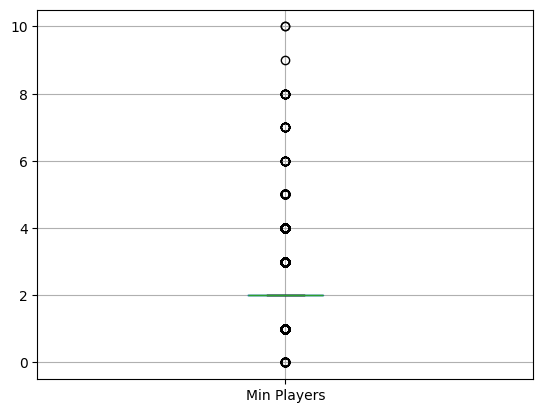

In [998]:
df.boxplot(column='Min Players')
plt.show()

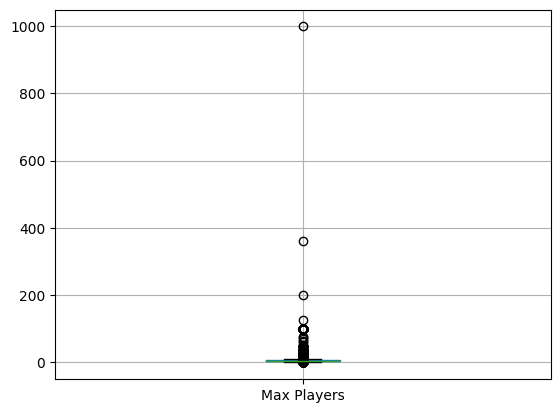

In [999]:
df.boxplot(column='Max Players')
plt.show()

In [1000]:
# df = df[(df[['Year Published', 'Min Players', 'Max Players', 'Play Time', 'Users Rated', 'BGG Rank', 'Complexity Average', 'Owned Users']] != 0).all(axis=1)]

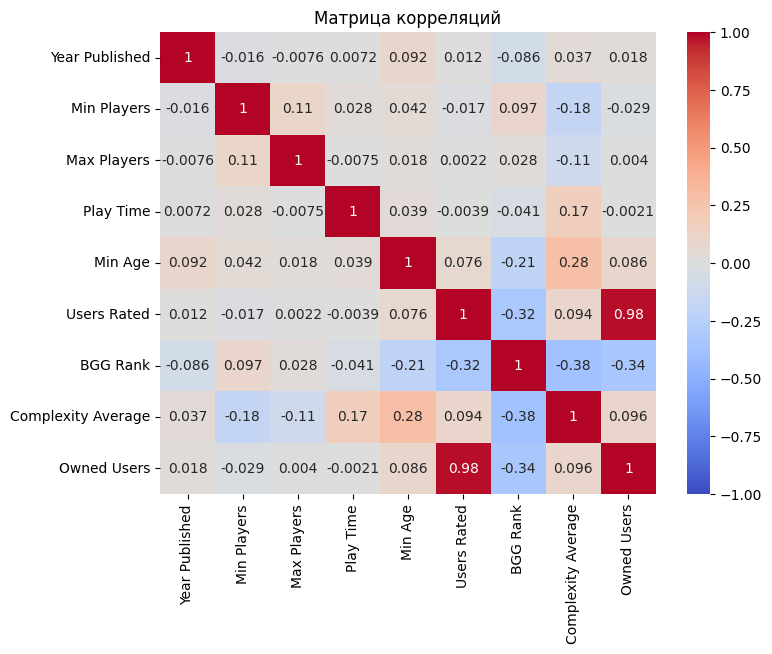

In [1001]:
corr = df[["Year Published", "Min Players", "Max Players", "Play Time", "Min Age", "Users Rated", "BGG Rank", "Complexity Average", "Owned Users"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Матрица корреляций')
plt.show()

In [1002]:
df = df.drop(['Name'], axis=1)

In [1003]:
Y = df['Rating Average']
X = df.drop('Rating Average', axis=1)
X.head()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,BGG Rank,Complexity Average,Owned Users,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,174430.0,2017.0,1,4,120,14,42055,1,3.86,68323.0,0,0,0,0,0,1,1,0
1,224517.0,2018.0,2,4,120,14,19217,3,3.91,28785.0,0,0,0,0,0,1,0,0
2,167791.0,2016.0,1,5,120,12,64864,4,3.24,87099.0,0,0,0,0,0,1,0,0
3,233078.0,2017.0,3,6,480,14,13468,5,4.22,16831.0,0,0,0,0,0,1,1,0
4,291457.0,2020.0,1,4,120,14,8392,6,3.55,21609.0,0,0,0,0,0,1,1,0


In [1004]:
Y = Y.astype('float64')

In [1005]:
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=False)


mse = -cross_val_score(model, X, Y, cv=cv, scoring="neg_mean_squared_error")

print("MSE по фолдам:", mse)
print("Средний MSE:", mse.mean())

MSE по фолдам: [0.46293892 0.24848294 0.37330718 0.29833423 0.77820949]
Средний MSE: 0.43225455188200385


In [1006]:
final_model = LinearRegression()
final_model.fit(X, Y)

LinearRegression()

In [1007]:
test.isna().sum()

ID                       6
Name                     0
Year Published           0
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
BGG Rank                 0
Complexity Average       0
Owned Users              6
Mechanics              398
Domains               2510
dtype: int64

In [1008]:
test = test.drop(['Name', 'Mechanics'], axis=1)
test['Owned Users'].fillna(test['Owned Users'].median(), inplace=True)
test['ID'].fillna(test['ID'].median(), inplace=True)

test = test.join(test['Domains'].str.get_dummies(sep=', '))
test = test.drop('Domains', axis=1)

X_test = test

/tmp/ipykernel_18534/1031165624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Owned Users'].fillna(test['Owned Users'].median(), inplace=True)
/tmp/ipykernel_18534/1031165624.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [1009]:
X_test = X_test.replace(',', '.', regex=True)
X_test['Complexity Average'] = X_test['Complexity Average'].astype('float64')


In [1010]:
test_preds = final_model.predict(X_test)
test_preds

array([6.945594  , 7.69532444, 7.9665599 , ..., 4.89739996, 4.86036873,
       4.86969365], shape=(5086,))

In [1011]:
submission = pd.DataFrame({
    'index': range(len(test_preds)),
    'Rating Average': test_preds
})
submission.to_csv('baseline.csv', index=False)